# Implementing market basket analysis

market basket analysis is an exploratory data analysis technique used to uncover patterns and associations in transaction data. Its primary goal is to provide insights for business decision-making rather than to produce predictive accuracy scores like in machine learning models. Therefore, the evaluation is more qualitative and context-dependent.

In [2]:
!pip install mlxtend

# LIBRARIES

In [69]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import zipfile


# PRE PRCESSING DATA TO MAKE BASKET AGAINT EACH INVOICE

In [72]:
def load_and_preprocess_data(csv_file_name, zip_file_path):
    # Load the dataset
    with zipfile.ZipFile(zip_file_path, 'r') as zip_file:
        with zip_file.open(csv_file_name) as csv_file_in_zip:
            myretaildata = pd.read_csv(csv_file_in_zip)

    # Data Cleaning
    myretaildata['Description'] = myretaildata['Description'].str.strip()
    myretaildata.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
    myretaildata['InvoiceNo'] = myretaildata['InvoiceNo'].astype('str')
    myretaildata = myretaildata[~myretaildata['InvoiceNo'].str.contains('C')]

    return myretaildata

# MODEL TRAINING (FREQEUENT ITEMS SET AND RULES ASSOCAITION)

In [73]:
# Analyze market basket
def analyze_market_basket(myretaildata, country_filter='Germany', min_support=0.07, min_lift=3, min_confidence=0.3):
    # Filter data for a specific country (default is Germany)
    myretaildata = myretaildata[myretaildata['Country'] == country_filter]

    # Create a basket of transactions
    mybasket = (myretaildata.groupby(['InvoiceNo', 'Description'])['Quantity']
                .sum().unstack().reset_index().fillna(0)
                .set_index('InvoiceNo'))

    # Encode the basket data (convert quantities to binary)
    def encode_units(x):
        if x <= 0:
            return 0
        if x >= 1:
            return 1

    my_basket_sets = mybasket.applymap(encode_units)
    my_basket_sets.drop('POSTAGE', inplace=True, axis=1)

    # Generate frequent itemsets
    frequent_itemsets = apriori(my_basket_sets, min_support=min_support, use_colnames=True)

    # Generate association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

    # Filter rules based on lift and confidence
    filtered_rules = rules[(rules['lift'] >= min_lift) & (rules['confidence'] >= min_confidence)]

    return my_basket_sets, frequent_itemsets, filtered_rules

# RESULTS VISUZLAITION

In [74]:
# Visualize market basket results
def visualize_market_basket_results(my_basket_sets, frequent_itemsets, filtered_rules):
    # Visualize the frequent itemsets
    frequent_itemsets['support'].plot(kind='bar', title='Frequent Itemsets')
    plt.xlabel('Itemsets')
    plt.ylabel('Support')
    plt.xticks([])  # Disable x-axis labels
    plt.show()

    # Visualize the association rules
    filtered_rules[['antecedents', 'consequents', 'lift', 'confidence']].plot(kind='bar', title='Association Rules')
    plt.xlabel('Rules')
    plt.ylabel('Metrics')
    plt.xticks([])  # Disable x-axis labels
    plt.legend(["Lift", "Confidence"])
    plt.show()

# USAGES

In [75]:
zip_file_path = 'data-2.csv.zip'  # Replace with the path to your ZIP file
csv_file_name = 'data-2.csv'

myretaildata = load_and_preprocess_data(csv_file_name,zip_file_path)
# Analyze market basket
my_basket_sets, frequent_itemsets, filtered_rules = analyze_market_basket(myretaildata)

C:\Users\Ali Haider\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [76]:
my_basket_sets

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
frequent_itemsets

,support,itemsets
0,0.102845,(6 RIBBONS RUSTIC CHARM)
1,0.070022,(ALARM CLOCK BAKELIKE PINK)
2,0.072210,(GUMBALL COAT RACK)
3,0.091904,(JAM MAKING SET PRINTED)
4,0.078775,(JUMBO BAG RED RETROSPOT)
5,0.100656,(JUMBO BAG WOODLAND ANIMALS)
6,0.078775,(LUNCH BAG WOODLAND)
7,0.085339,(PACK OF 72 RETROSPOT CAKE CASES)
8,0.115974,(PLASTERS IN TIN CIRCUS PARADE)
9,0.107221,(PLASTERS IN TIN SPACEBOY)


In [78]:
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.245077,0.157549,0.131291,0.535714,3.400298,0.092679,1.814509,0.935072
3,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.529540,0.837922


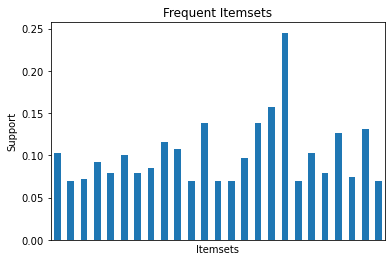

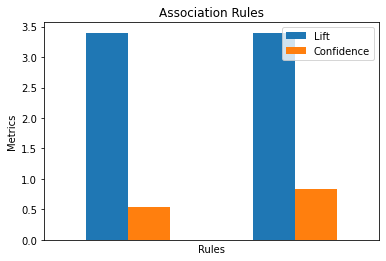

In [79]:
# Visualize market basket results
visualize_market_basket_results(my_basket_sets, frequent_itemsets, filtered_rules)

# RECOMMENDATION

In [68]:
def recommend_items(item, filtered_rules, top_n=5):
    recommendations = []
    # Filter rules where the given item is in the antecedents
    relevant_rules = filtered_rules[filtered_rules['antecedents'].apply(lambda x: item in x)]

    # Sort rules by lift in descending order
    relevant_rules = relevant_rules.sort_values(by='lift', ascending=False)

    # Extract the consequents (recommended items)
    recommended_items = relevant_rules['consequents'].tolist()

    # Flatten the list of recommended items
    recommended_items = [item for sublist in recommended_items for item in sublist]

    # Remove the input item from recommendations
    recommended_items = [i for i in recommended_items if i != item]

    # Take the top N recommendations
    recommendations = recommended_items[:top_n]

    return recommendations

# Assuming you have already performed market basket analysis and have filtered_rules
recommended_items = recommend_items("ROUND SNACK BOXES SET OF4 WOODLAND", filtered_rules, top_n=5)
print("Recommended Items:", recommended_items)


Recommended Items: ['ROUND SNACK BOXES SET OF 4 FRUITS']
